# Visualización de Datos

## Pre-procesamiento de Datos

In [3]:
import pandas as pd

In [4]:
ruta_archivo = 'Data_Banco.csv'

data_banco_df = pd.read_csv(ruta_archivo, sep=',')
data_banco_df.rename(columns={'Sucursal':'ID_Sucursal', 'Cajero':'ID_Cajero'}, inplace=True)

escala = ['Muy Malo', 'Malo', 'Regular', 'Bueno', 'Muy Bueno']
data_banco_df.Satisfaccion = pd.Categorical(
    data_banco_df.Satisfaccion,
    categories=escala,
    ordered=True
)
tipo_transaccion = list(set(data_banco_df.Transaccion))
data_banco_df.Transaccion = pd.Categorical(
    data_banco_df.Transaccion,
    categories=tipo_transaccion
)
data_banco_df['Tiempo_Servicio_min'] = data_banco_df['Tiempo_Servicio_seg']/60
data_banco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24299 entries, 0 to 24298
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID_Sucursal          24299 non-null  int64   
 1   ID_Cajero            24299 non-null  int64   
 2   ID_Transaccion       24299 non-null  int64   
 3   Transaccion          24299 non-null  category
 4   Tiempo_Servicio_seg  24299 non-null  float64 
 5   Satisfaccion         24299 non-null  category
 6   Monto                24299 non-null  float64 
 7   Tiempo_Servicio_min  24299 non-null  float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 1.2 MB


In [5]:
ruta_archivo = 'Data_Cajero.csv'

data_cajero_df = pd.read_csv(ruta_archivo, sep=',')
data_cajero_df.rename(columns={'Cajero':'ID_Cajero', 'Anio Ingreso':'Anio_Ingreso'}, inplace=True)

nivel_formacion = list(set(data_cajero_df.Nivel_Formacion))

data_cajero_df.Nivel_Formacion = pd.Categorical(
    data_cajero_df.Nivel_Formacion,
    categories=nivel_formacion
)
data_cajero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID_Cajero        27 non-null     int64   
 1   Edad             27 non-null     int64   
 2   Sexo             27 non-null     object  
 3   Nivel_Formacion  27 non-null     category
 4   Anio_Ingreso     27 non-null     int64   
dtypes: category(1), int64(3), object(1)
memory usage: 1.2+ KB


In [6]:
ruta_archivo = 'Data_Sucursal.csv'

data_sucursal_df = pd.read_csv(ruta_archivo, sep=',')
data_sucursal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Sucursal    5 non-null      int64 
 1   Sucursal       5 non-null      object
 2   Nuevo_Sistema  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [7]:
data_banco_df = pd.merge(data_banco_df, data_sucursal_df, how='inner', on='ID_Sucursal')
data_banco_df = pd.merge(data_banco_df, data_cajero_df, how='inner', on='ID_Cajero')
data_banco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24299 entries, 0 to 24298
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID_Sucursal          24299 non-null  int64   
 1   ID_Cajero            24299 non-null  int64   
 2   ID_Transaccion       24299 non-null  int64   
 3   Transaccion          24299 non-null  category
 4   Tiempo_Servicio_seg  24299 non-null  float64 
 5   Satisfaccion         24299 non-null  category
 6   Monto                24299 non-null  float64 
 7   Tiempo_Servicio_min  24299 non-null  float64 
 8   Sucursal             24299 non-null  object  
 9   Nuevo_Sistema        24299 non-null  object  
 10  Edad                 24299 non-null  int64   
 11  Sexo                 24299 non-null  object  
 12  Nivel_Formacion      24299 non-null  category
 13  Anio_Ingreso         24299 non-null  int64   
dtypes: category(3), float64(3), int64(5), object(3)
memory usage: 2.1+ MB


## Análisis Exploratorio de los datos

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Variable Numérica vs. Variable Numérica

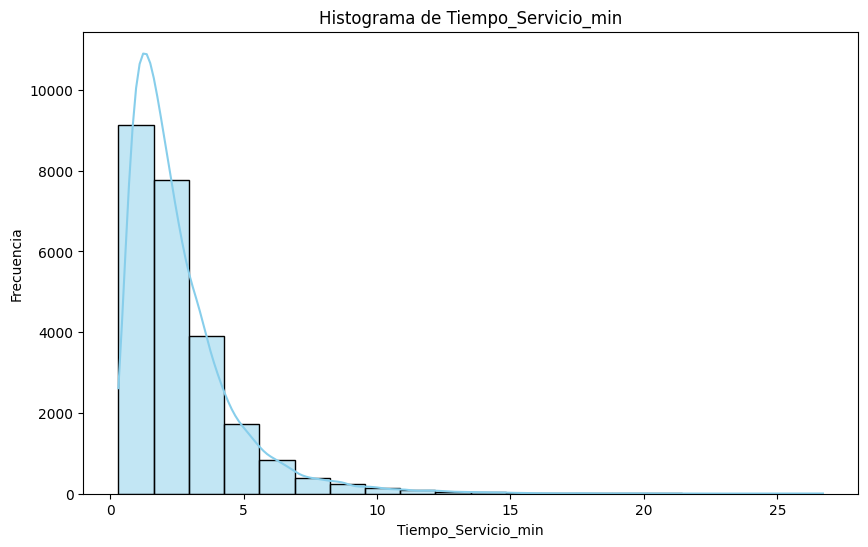

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data_banco_df, x='Tiempo_Servicio_min', kde=True, bins=20, color='skyblue')

plt.title('Histograma de Tiempo_Servicio_min')
plt.xlabel('Tiempo_Servicio_min')
plt.ylabel('Frecuencia')
plt.show()

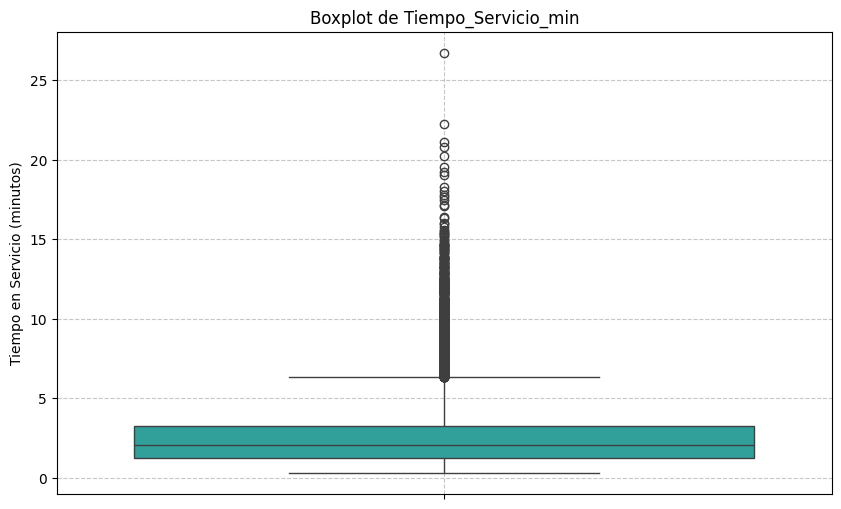

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data_banco_df, y='Tiempo_Servicio_min', color='lightseagreen')

plt.title('Boxplot de Tiempo_Servicio_min')
plt.ylabel('Tiempo en Servicio (minutos)')

plt.grid(True, linestyle='--', alpha=0.7) # Añadir una rejilla para mejor lectura
plt.show()

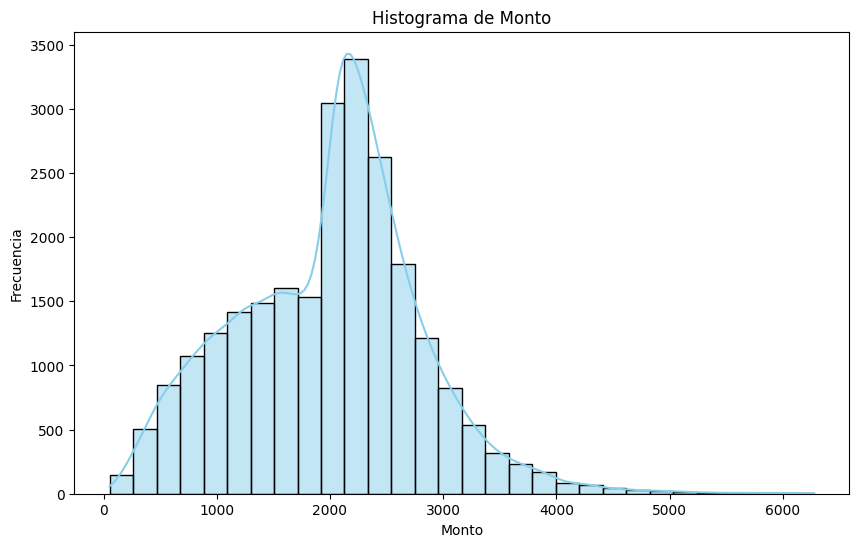

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data_banco_df, x='Monto', kde=True, bins=30, color='skyblue')

plt.title('Histograma de Monto')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

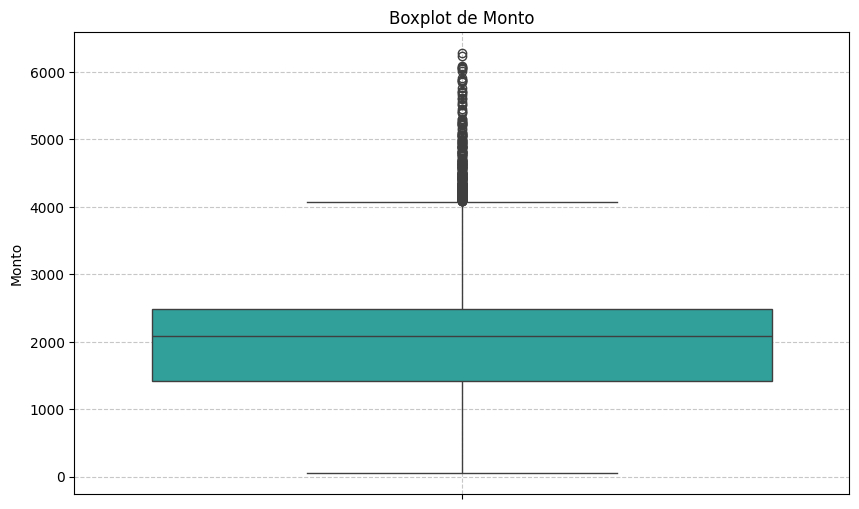

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data_banco_df, y='Monto', color='lightseagreen')

plt.title('Boxplot de Monto')
plt.ylabel('Monto')

plt.grid(True, linestyle='--', alpha=0.7) # Añadir una rejilla para mejor lectura
plt.show()

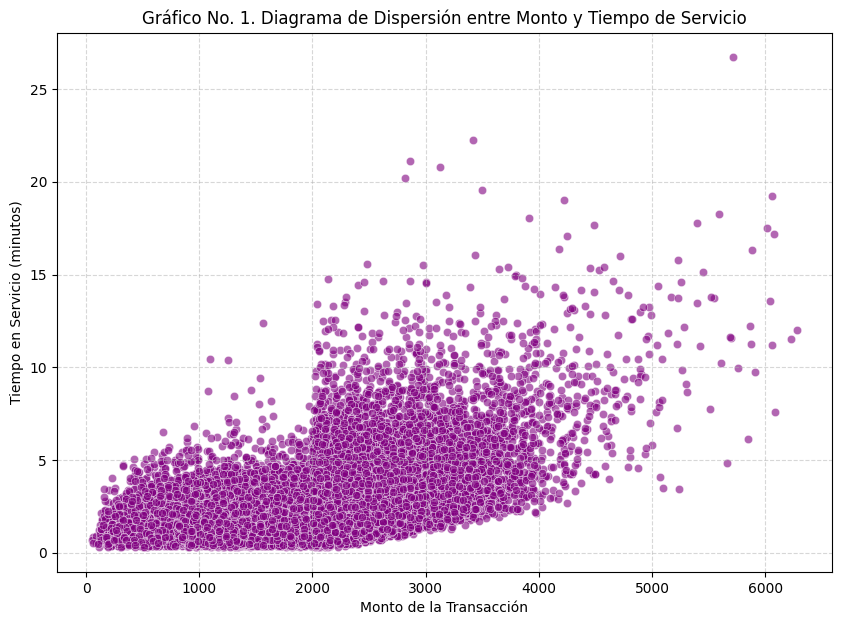

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_banco_df, x='Monto', y='Tiempo_Servicio_min', alpha=0.6, color='purple')

plt.title('Gráfico No. 1. Diagrama de Dispersión entre Monto y Tiempo de Servicio')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Tiempo en Servicio (minutos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

En el Gráfico No. 1, se puede observar que entre Tiempo_Servicio_min y Monto no existe una relación lineal; sin embargo, existe una relación entre ellas.

In [14]:
correlacion_spearman_series = data_banco_df['Monto'].corr(data_banco_df['Tiempo_Servicio_min'], method='spearman')
correlacion_spearman_series

np.float64(0.5338340452131364)

### Variable Numérica vs. Variable Categórica

In [15]:
tabla_frecuencias_sucursal = data_banco_df['Sucursal'].value_counts().sort_index()
tabla_frecuencias_sucursal

,count
Sucursal,
Alborada,3329
Centro,12044
Mall del Sol,4190
Riocentro Sur,2838
Via Daule,1898


<ipython-input-16-1cca46cf3876>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_banco_df, x='Sucursal', palette='viridis', order=tabla_frecuencias_sucursal.index)


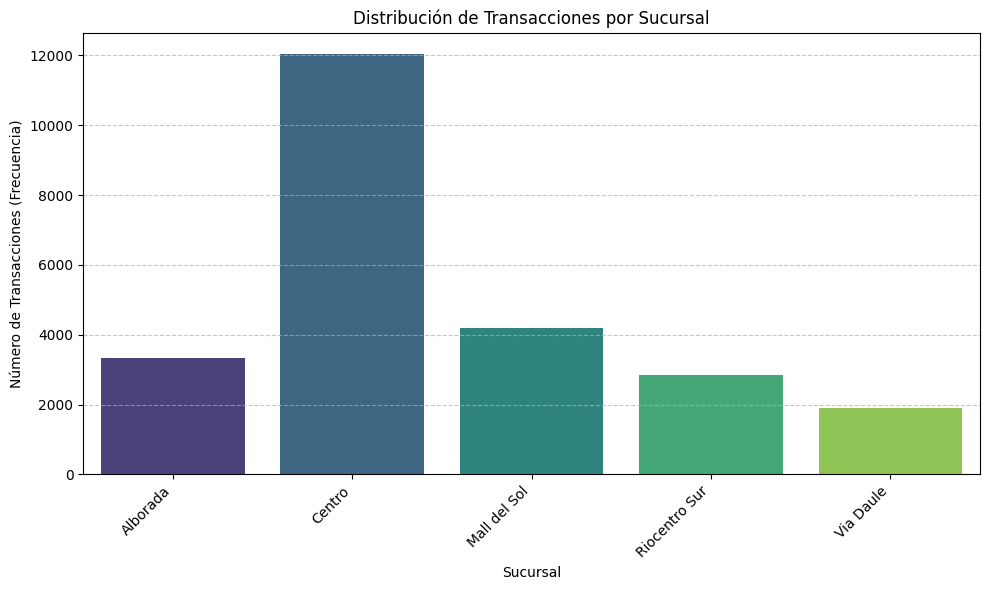

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_banco_df, x='Sucursal', palette='viridis', order=tabla_frecuencias_sucursal.index)

plt.title('Distribución de Transacciones por Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Número de Transacciones (Frecuencia)')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el layout para que todo quepa bien
plt.show()

In [17]:
tabla_frecuencias_nivel_formacion = data_banco_df['Nivel_Formacion'].value_counts().sort_index()
tabla_frecuencias_nivel_formacion

,count
Nivel_Formacion,
Univ Incom.,7358
Tecnologia,1723
Tercer nivel,4266
Bachiller,10952


In [18]:
tabla_frecuencias_transaccion = data_banco_df['Transaccion'].value_counts().sort_index()
tabla_frecuencias_transaccion

,count
Transaccion,
Cobro/Pago (Cta externa),3005
Deposito,15887
Cobrar cheque (Cta del Bco),5407


<ipython-input-19-3dbc46a9265e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_banco_df, x='Transaccion', palette='viridis', order=tabla_frecuencias_transaccion.index)


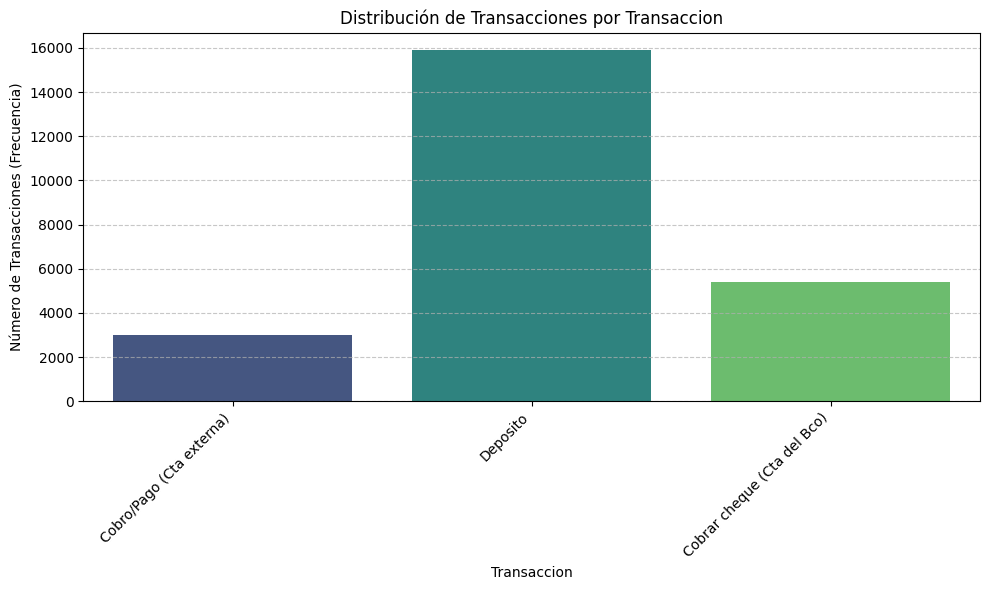

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_banco_df, x='Transaccion', palette='viridis', order=tabla_frecuencias_transaccion.index)

plt.title('Distribución de Transacciones por Transaccion')
plt.xlabel('Transaccion')
plt.ylabel('Número de Transacciones (Frecuencia)')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el layout para que todo quepa bien
plt.show()

<ipython-input-20-661c54ef8057>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_banco_df, x='Sucursal', y='Monto', palette='viridis')
<ipython-input-20-661c54ef8057>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Nuevo Sistema')


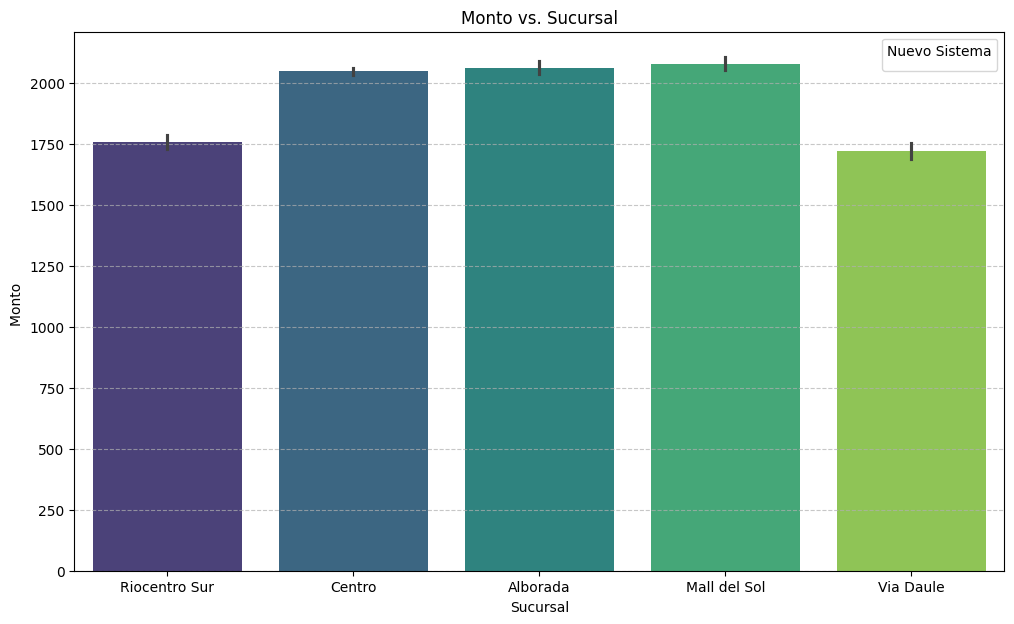

In [20]:
plt.figure(figsize=(12, 7))
sns.barplot(data=data_banco_df, x='Sucursal', y='Monto', palette='viridis')
plt.title('Monto vs. Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Monto ')
plt.legend(title='Nuevo Sistema')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-25-4997d64ce44c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_banco_df, x='Sucursal', y='Tiempo_Servicio_min', palette='viridis')


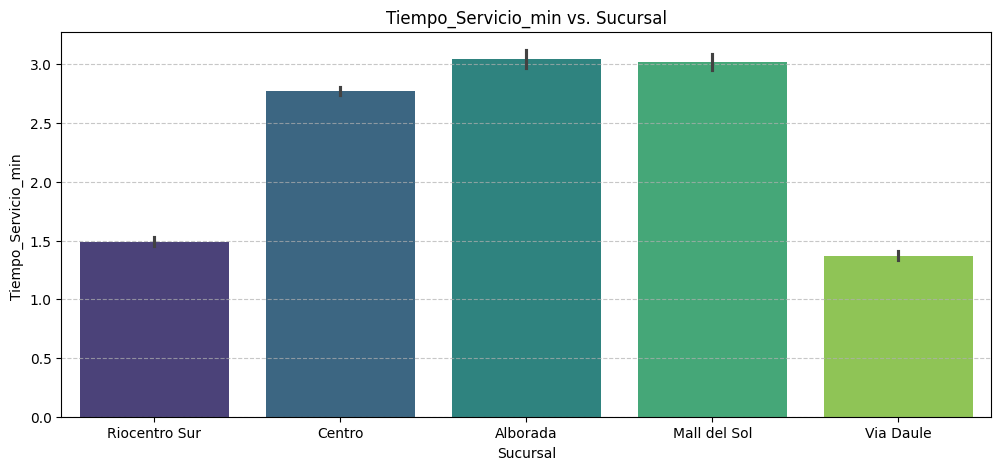

In [25]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_banco_df, x='Sucursal', y='Tiempo_Servicio_min', palette='viridis')
plt.title('Tiempo_Servicio_min vs. Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Tiempo_Servicio_min ')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-29-5a14286c4e72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_banco_df, x='Satisfaccion', y='Tiempo_Servicio_seg', palette='viridis')


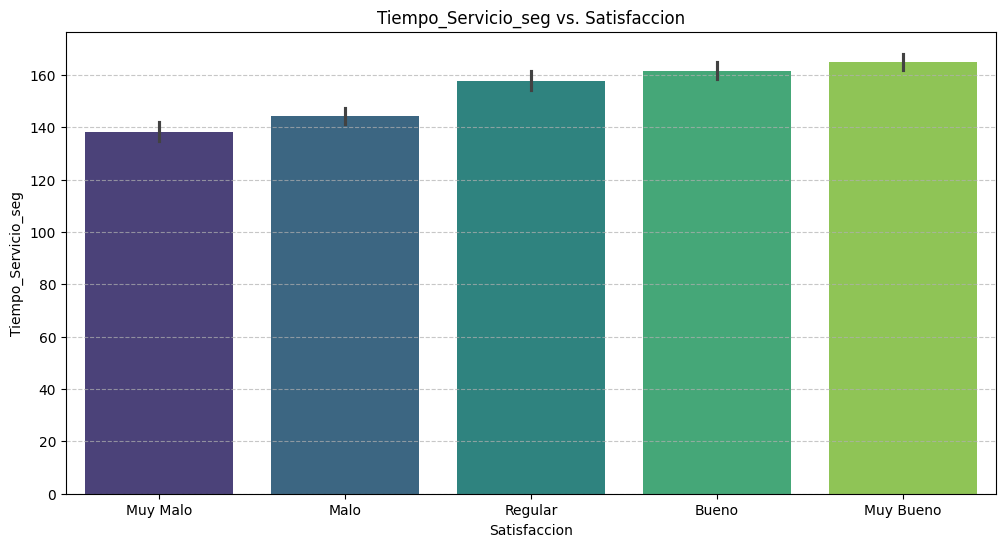

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_banco_df, x='Satisfaccion', y='Tiempo_Servicio_seg', palette='viridis')
plt.title('Tiempo_Servicio_seg vs. Satisfaccion')
plt.xlabel('Satisfaccion')
plt.ylabel('Tiempo_Servicio_seg')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()